# MILESTONE 2 PHASE 1
`Kevin Boy Gunawan`
<br>

`FTDS-009`

## 1. Introduction

sekarang adalah tahun 2022 dan kita semua berada di ambang perubahan iklim besar-besaran. Dengan kondisi pemanasan global dan bahan bakar fosil semakin menipis, namun tidak sejalan dengan kebutuhuan energi manusia yang semakin meningkat dan kita bertanggung jawab atas semua permasalahan ini. Negara-negara berkembang di seluruh dunia sedang melakukan perubahan menuju sumber energi yang lebih bersih dan mencari cara untuk memperluas kekuatan sumber energi global mereka.

Beralih ke sumber energi terbarukan adalah cara terbaik untuk mengurangi ketergantungan pada bahan bakar impor dan meningkatkan efisiensi biaya. Sudah saatnya kita bergerak menuju masa depan rendah karbon dengan merangkul energi surya, hidro, panas bumi dan sebagainya, untuk melindungi alam.

Sumber energi efisien terbarukan yang paling populer di seluruh dunia adalah turbin angin. Turbin angin menghasilkan tenaga dengan menangkap energi kinetik angin. Faktor-faktor seperti suhu, arah angin, status turbin, cuaca, sudut, dan sebagainya mempengaruhi jumlah daya yang dihasilkan.

**Objective**

Objective dari projek ini adalah membangun model machine learning yang dapat memprediksi daya yang dihasilkan (dalam KW/h) berdasarkan berbagai fitur yang disediakan dalam sekumpulan data.
<br>
<br>
Model yang digunakan dalam projek ini antara lain : Linear Regression, Ridge, Lasso, dan Decision Tree Regressor
<br>
<br>
Dataset pada projek ini dapat di unduk melalui url beriku : 
https://www.kaggle.com/datasets/emnikkhil/predict-the-powerkwh-produced-by-windmills

## 2. Import Libraries

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

import pickle
import warnings
warnings.filterwarnings("ignore")

## 3. Data Loading

In [156]:
# load data train
data = pd.read_csv('D:/kevin_bootcamp/hacktiv8/train_turbine.csv')

In [157]:
# load data test
data_test = pd.read_csv('D:/kevin_bootcamp/hacktiv8/test_turbine.csv')

In [158]:
pd.set_option("display.max_columns", 50)

In [159]:
data.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [161]:
data.isnull().sum().sort_values(ascending=False)

wind_direction(°)                 5103
blade_length(m)                   5093
atmospheric_temperature(°C)       3450
atmospheric_pressure(Pascal)      2707
windmill_body_temperature(°C)     2363
turbine_status                    1759
rotor_torque(N-m)                  572
windmill_height(m)                 543
cloud_level                        276
wind_speed(m/s)                    273
blades_angle(°)                    216
windmill_generated_power(kW/h)     207
motor_torque(N-m)                   24
engine_temperature(°C)              12
generator_temperature(°C)           12
shaft_temperature(°C)                2
resistance(ohm)                      1
gearbox_temperature(°C)              1
blade_breadth(m)                     0
tracking_id                          0
datetime                             0
area_temperature(°C)                 0
dtype: int64

In [162]:
data.duplicated().sum()

0

In [163]:
data.nunique()

tracking_id                       28200
datetime                          28200
wind_speed(m/s)                   27727
atmospheric_temperature(°C)       20809
shaft_temperature(°C)             27625
blades_angle(°)                   22830
gearbox_temperature(°C)           27911
engine_temperature(°C)            28188
motor_torque(N-m)                 27660
generator_temperature(°C)         28187
atmospheric_pressure(Pascal)      25492
area_temperature(°C)              28170
windmill_body_temperature(°C)     21893
wind_direction(°)                 22984
resistance(ohm)                   27365
rotor_torque(N-m)                 25945
turbine_status                       14
cloud_level                           3
blade_length(m)                   22833
blade_breadth(m)                  28200
windmill_height(m)                27657
windmill_generated_power(kW/h)    27988
dtype: int64

In [164]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
wind_speed(m/s),27927.0,69.037071,76.275645,-4.962110e+02,20.883502,93.302129,95.268058,6.014557e+02
atmospheric_temperature(°C),24750.0,0.383727,44.278534,-9.900000e+01,7.948900,16.102410,23.687285,8.021744e+01
shaft_temperature(°C),28198.0,40.085387,27.204430,-9.900000e+01,41.633238,43.686082,45.673685,1.698205e+02
blades_angle(°),27984.0,-9.654038,47.918161,-1.462595e+02,-1.197652,-0.495608,5.495030,1.659321e+02
gearbox_temperature(°C),28199.0,41.027755,43.663605,-2.449741e+02,40.557952,43.221735,45.879425,9.990000e+02
engine_temperature(°C),28188.0,42.614239,6.124546,3.167151e+00,41.911365,43.525297,45.174246,5.000000e+01
motor_torque(N-m),28176.0,1710.819803,827.205537,5.000000e+02,870.340239,2031.849540,2462.585729,3.000000e+03
generator_temperature(°C),28188.0,65.027857,19.816499,3.389378e+01,41.198509,70.729533,78.945849,1.000000e+02
atmospheric_pressure(Pascal),25493.0,53185.064883,187503.615642,-1.188624e+06,16794.921490,18191.125867,118113.289822,1.272552e+06
area_temperature(°C),28200.0,32.735091,7.703391,-3.000000e+01,27.311644,32.605195,38.232387,5.500000e+01


berdasarkan describe diatas, penulis menemukan beberapa fakta janggal terkait dataset 
* normalnya speed bukanlah sebuah besaran vektor jadi speed bertanda negatif penulis rasa tidak valid
* normalnya tekanan atmosfer tidak bertanda negatif, tapi pada dataset ada nilai atmopheric_pressure yang bertanda negatif
* besaran panjang normalnya tidak bertanda negatif, tapi pada kolom windmill_height, blade_length ada nilai yang bertanda negatif


In [165]:
data.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)',
       'windmill_generated_power(kW/h)'],
      dtype='object')

agar lebih industry-standard maka blade_length akan di ubah kedalam bentuk rotor_diameter

In [166]:
data['blade_length(m)'] = data['blade_length(m)']*2

In [167]:
def data_rename(datas):
  datas = datas.rename(columns={'wind_speed(m/s)': 'wind_spd', 'atmospheric_temperature(°C)': 'atm_temp',
                    'shaft_temperature(°C)': 'shaft_temp', 'blades_angle(°)': 'blades_agl',
                     'gearbox_temperature(°C)': 'gearbox_temp', 'engine_temperature(°C)': 'engine_temp',
                     'motor_torque(N-m)': 'motor_torque', 'generator_temperature(°C)': 'generator_temp',
                     'atmospheric_pressure(Pascal)': 'atm_press', 'area_temperature(°C)': 'area_temp',
                     'windmill_body_temperature(°C)': 'body_temp', 'wind_direction(°)': 'wind_direction',
                     'resistance(ohm)': 'resistance', 'rotor_torque(N-m)': 'rotor_torque', 
                     'blade_length(m)': 'rotor_diameter', 'blade_breadth(m)': 'blade_breadth', 
                     'windmill_height(m)': 'windmill_height', 'windmill_generated_power(kW/h)': 'power'})
  return datas

In [168]:
data = data_rename(data)

In [169]:
rs = 0

## 4. Exploratory Data Analysis (EDA)

In [170]:
data.head()

,tracking_id,datetime,wind_spd,atm_temp,shaft_temp,blades_agl,gearbox_temp,engine_temp,motor_torque,generator_temp,atm_press,area_temp,body_temp,wind_direction,resistance,rotor_torque,turbine_status,cloud_level,rotor_diameter,blade_breadth,windmill_height,power
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,4.435083,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,8.420693,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,5.438950,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,9.714770,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [171]:
data.tracking_id.nunique()

28200

beberapa besaran yang secara fisika seharusnya tidak bertanda negatif akan penulis ubah semua nilainya menjadi positif

In [172]:
for i in ['wind_spd', 'atm_press', 'windmill_height', 'rotor_diameter', 'rotor_torque', 'blades_agl']:
  data[i] = abs(data[i])

In [173]:
def tri_plot(data1, data2, xlimit=''):
  fig, axe = plt.subplots(1,3,figsize=(16,4))
  sns.kdeplot(data=data1, ax=axe[0])
  sns.scatterplot(x=data1, y=data2, alpha=1, ax=axe[1])
  if xlimit == '' :
    sns.kdeplot(data=data2, ax=axe[2])
  else:
    axe[1].set_xlim(xlimit)
    sns.kdeplot(data=data2, ax=axe[2])

### Surrounding Related EDA

In [174]:
#natural = ['atm_temp', 'atm_press', 'area_temp', 'wind_direction']

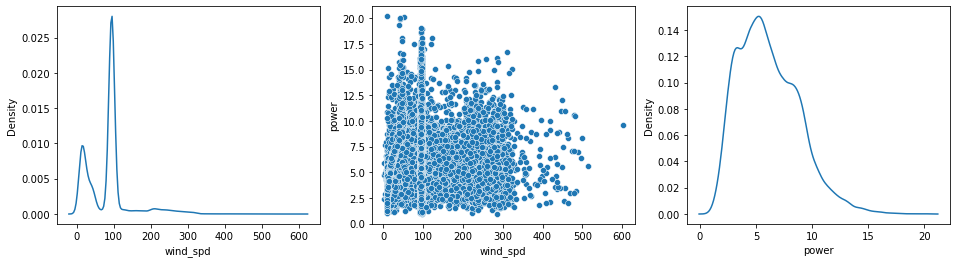

In [175]:
tri_plot(data['wind_spd'], data['power'])

hubungan antara kecepatan angin dan output power yang dihasilkan oleh windmill dari scatterplot di atas sulit untuk penulis interpretasikan, karena ternyata tidak selamanya angin yang kencang akan membuat kincir angin memproduksi banyak power. hal ini tentunya didasari karena banyak faktor, salah satunya adalah mekanisme mesin di dalam turbin tersebut. angin yang kencang memang bagus, namun tidak untuk angin yang terlalu kencang. saat angin terlalu kencang dan rotor turbin berputar berlebihan maka protokol mekanisme mesin secara otomatis akan dimatikan untuk melindungi komponen mesin didalamnya agar tidak terjadi kerusakan. oleh sebab itu dalam teknologi turbin ada yang disebut dengan istilah shut-down speed.
<br>
<br>
sc : https://www.engineering.com/story/rooftop-wind-turbines-are-they-worthwhile-qxrvl

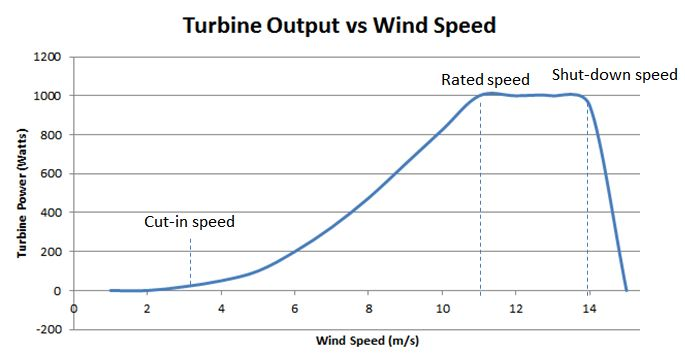

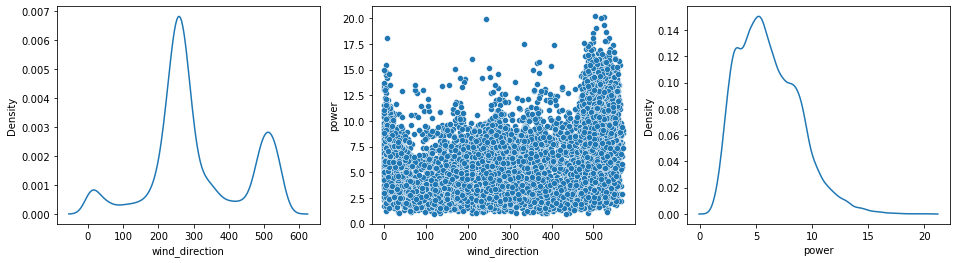

In [176]:
tri_plot(data['wind_direction'], data['power'])

power paling besar ternyata banyak dihasilkan pada saat arah anginnya adalah 0 derajat, 300 derajat, 500 derajat atau secara kasarnya kelipatan 360 derajat. hal ini mengindikasikan bahwa angin dengan arah tegak lurus dengan baling baling akan menghasilkan putaran yang paling kencang dan juga power yang besar

### Windmill Structure Related EDA

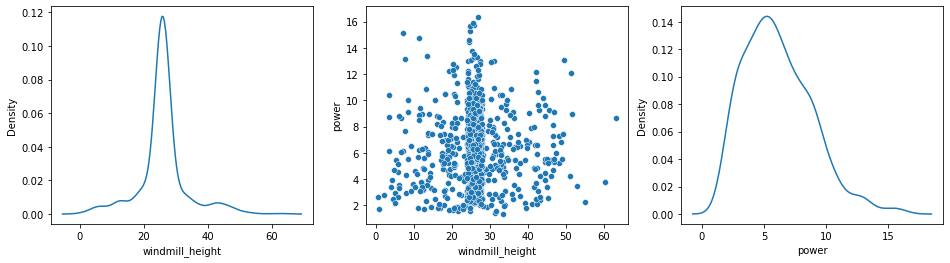

In [177]:
tri_plot(data.sample(1000, random_state=rs)['windmill_height'], data.sample(1000, random_state=rs)['power'])

distibusi windmill height menujukan bahwa pemusatan data sangat timpang terjadi di kisaran keinggian windmill 24-28 meter. penulis menduga bahwa pengukuran cenderung lebih banyak dilakukan pada windmill di ketiggian rentang 24-28 meter. dalam dunia industri & energi, windmill dengan rentang ukuran 24-28 tergolong kecil.

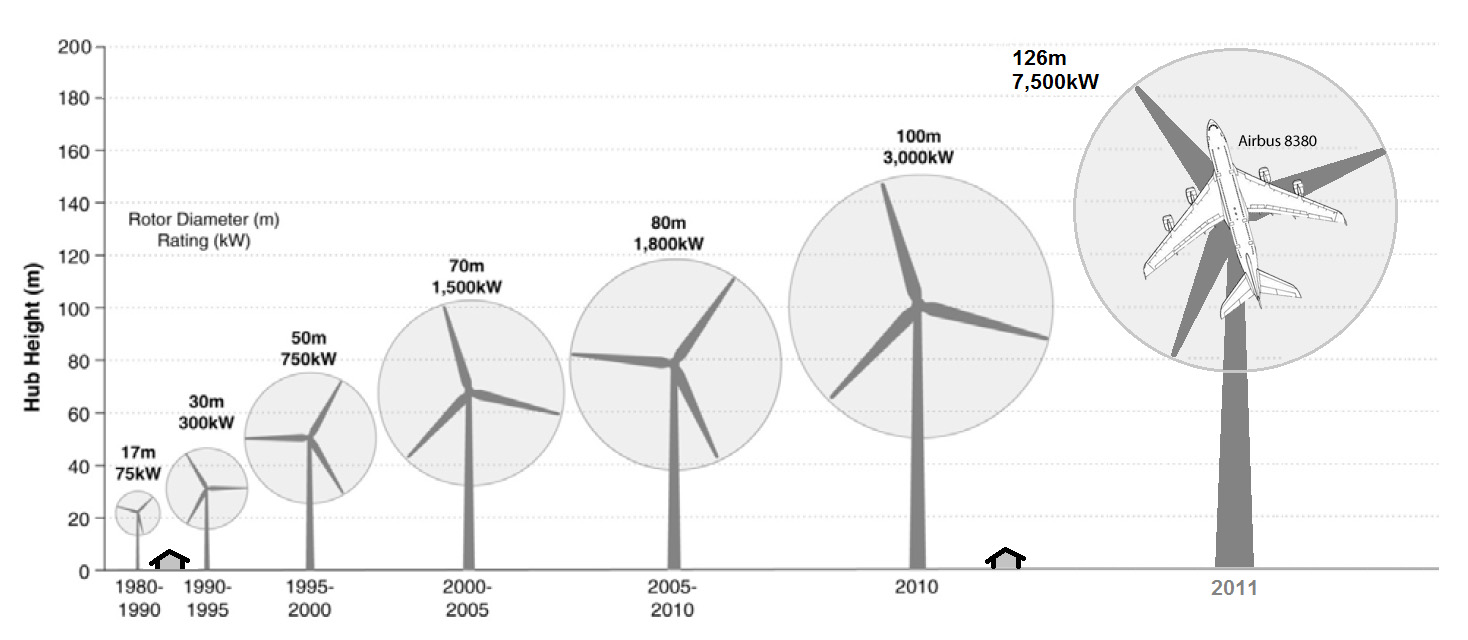

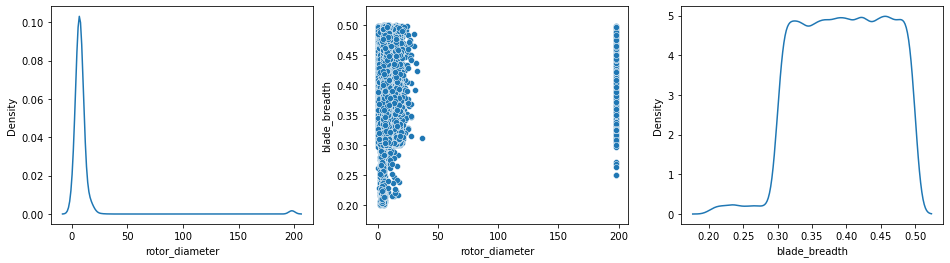

In [178]:
tri_plot(data['rotor_diameter'], data['blade_breadth'])

karena pengukuran banyak diambil pada windmill direntang ketinggin 24-28 menter maka konsekuensinya pengukuran diameter baling baling juga hanya bepusat atau dominan dikisaran 4 hingga 20 meter

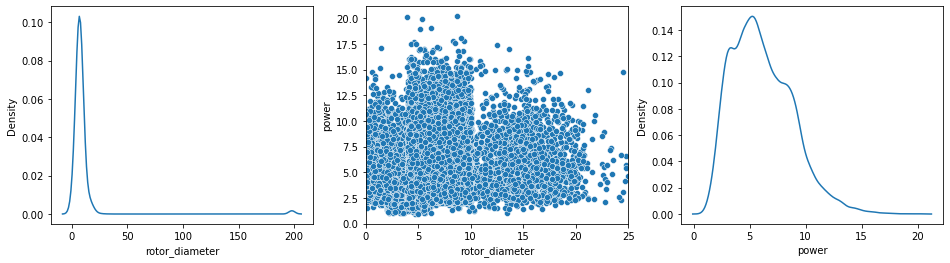

In [179]:
tri_plot(data['rotor_diameter'], data['power'], xlimit=[0,25])

berdasarkan scatter plot diatas tampak bahwa diameter blade atau kincir secara umum tidak membuat power naik. padahal menurut liteartur panjang blades sangat mempengaruhi perputaran kincir angin, dimana diameter kincir yang besar akan menyapu area lebih besar sehingga angin yang ditangkap akan semakin banyak dan membuat windmill lebih efektif tetap bisa berputar walau di area minim angin sekaligus

In [180]:
num_cols = ['wind_spd', 'atm_temp', 'shaft_temp', 'blades_agl', 'gearbox_temp', 'engine_temp', 'motor_torque',
            'generator_temp', 'atm_press', 'area_temp', 'body_temp', 'wind_direction', 'resistance', 'rotor_torque', 
            'rotor_diameter', 'blade_breadth', 'windmill_height', 'power']
cat_cols = ['turbine_status', 'cloud_level']

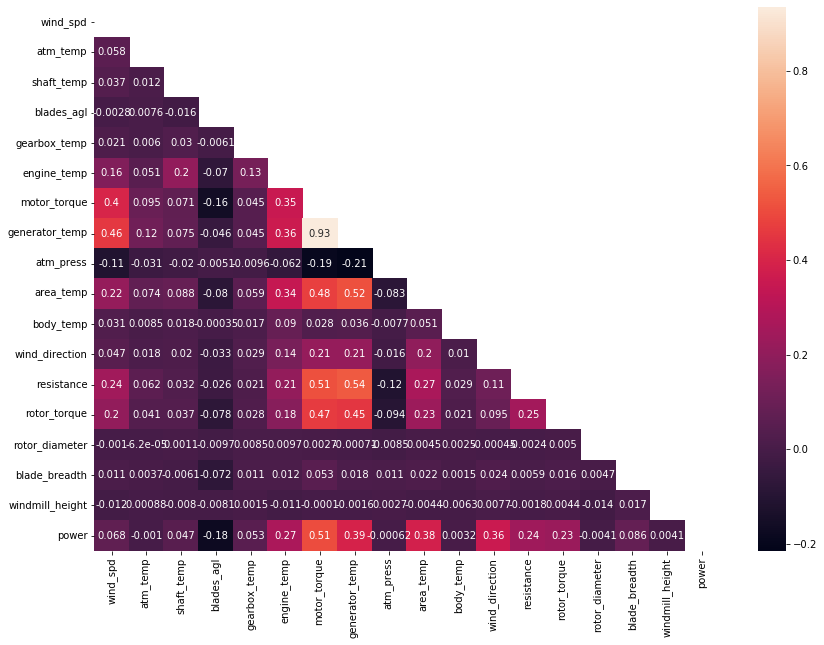

In [181]:
plt.figure(figsize=(14,10))
sns.heatmap(data[num_cols].corr(), annot=True, mask=np.triu(np.ones_like(data[num_cols].corr())));

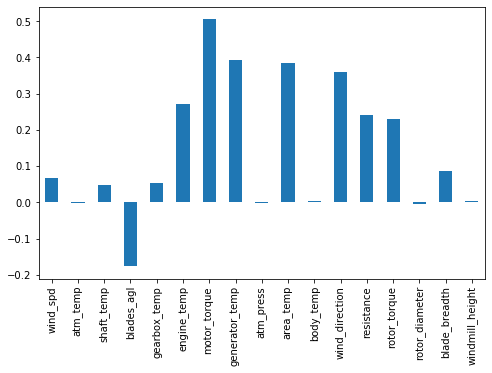

In [182]:
plt.figure(figsize=(8,5))
data[num_cols].corr().loc['power'].drop('power').plot(kind='bar')

* beberapa fitur yang memiliki korelasi tinggi dengan target antara lain, motor_torque, generator_temp, area_temp, dan wind_direction
* fitur motor_torque dan generator_temp memiliki korelasi yang sangat kuat yaitu 0.93
* fitur rotor_torque dan blades_agl memiliki korelasi yang sangat tinggi yaitu 1
* fitur atm_press, body_temp, rotor_diameter dan windmill height memiliki korelasi yang sangat lemah dengan target

## 5. Data Preprocessing

### a. Data Inference

In [183]:
data_inf = data_test

cek missing value pada data inference

In [184]:
data_inf.isnull().sum().sum()

9492

### b. Feature Selection

beberapa fitur yang memiliki antar korelasi tinggi akan didrop, begitu pula fitur yang kurang relevan juga akan di lakukan drop dari data train

In [185]:
data_new = data.drop(columns=['tracking_id', 'datetime', 'generator_temp', 'blades_agl', 'atm_press', 
                                  'body_temp', 'windmill_height', 'atm_temp'])

In [186]:
data_new.columns

Index(['wind_spd', 'shaft_temp', 'gearbox_temp', 'engine_temp', 'motor_torque',
       'area_temp', 'wind_direction', 'resistance', 'rotor_torque',
       'turbine_status', 'cloud_level', 'rotor_diameter', 'blade_breadth',
       'power'],
      dtype='object')

In [187]:
#update num_cols
num_cols = ['wind_spd', 'shaft_temp', 'gearbox_temp', 'engine_temp', 'motor_torque',
            'area_temp', 'wind_direction', 'resistance', 'rotor_torque', 'rotor_diameter',
            'blade_breadth', 'power']
cat_cols = ['turbine_status', 'cloud_level']

**Cardinality Reduction**

In [188]:
#cardinality reduction turbine_status columns
def reduce_turbine_status(datas):
  status = [['AAA', 'ABC'], ['A','A2'], ['AB','AC'], ['BCB', 'BBB'], ['B2','BA'], ['BB', 'B'], ['BD', 'D']]
  enc = ['Perfect (AAA)','Excellent (AA)','Verry Good (A)','Good (BBB)','Average (BB)','Poor (B)','Very Poor (CCC)']
  for i in range(len(enc)):
    datas = datas.replace({'turbine_status': status[i]}, enc[i])
  return datas

In [189]:
data_new = reduce_turbine_status(data_new)
data_new.head()

,wind_spd,shaft_temp,gearbox_temp,engine_temp,motor_torque,area_temp,wind_direction,resistance,rotor_torque,turbine_status,cloud_level,rotor_diameter,blade_breadth,power
0,94.820023,41.723019,82.410573,42.523015,2563.124522,26.897875,239.836388,2730.310605,42.084666,Average (BB),Medium,4.435083,0.314065,6.766521
1,241.832734,-99.000000,44.104919,46.258870,2372.384119,39.801469,337.944723,1780.207200,107.888643,Excellent (AA),Medium,8.420693,0.448494,5.966275
2,95.484724,41.855473,42.322098,42.878552,1657.169646,36.116065,227.850294,1666.049900,42.931459,Perfect (AAA),Medium,5.438950,0.302321,2.874342
3,238.819424,45.443914,44.759643,47.282101,2888.134079,46.020045,492.081520,1964.502895,42.744596,Perfect (AAA),NaN,9.714770,0.367140,14.851089
4,10.722890,41.981183,-17.616459,43.469852,781.695419,34.572941,259.274601,1177.516152,13.387289,Perfect (AAA),Medium,NaN,0.453374,3.519074


### c. Data Cleaning, Train-Test Split, & Transformation

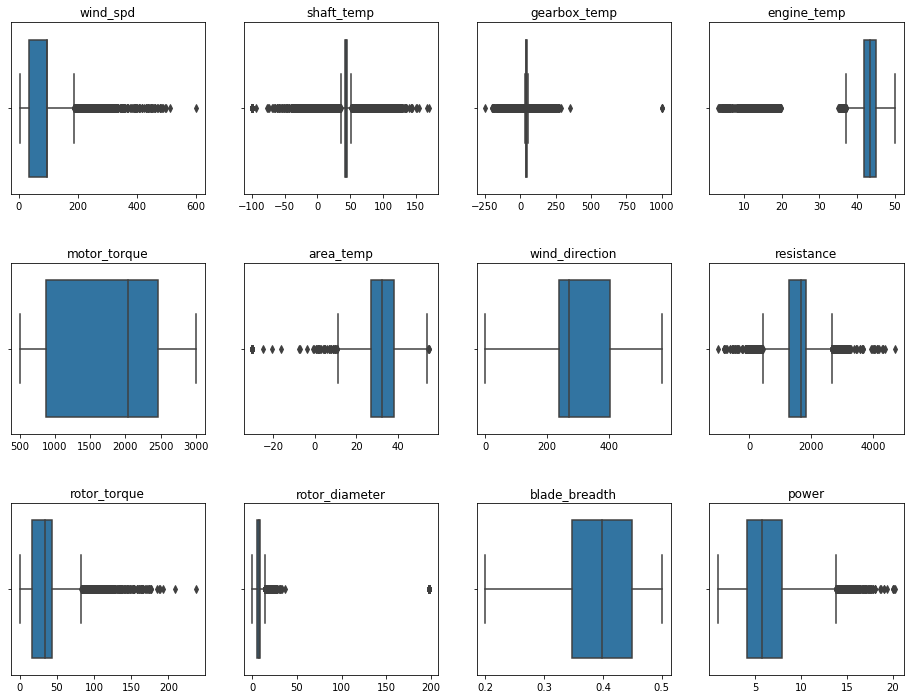

In [190]:
fig, axe = plt.subplots(3,4, figsize=(16,12));
axes = axe.flatten();
for i,j in enumerate(data_new[num_cols]):
  sns.boxplot(data_new[j], ax=axes[i]);
  axes[i].set_title(j);
  axes[i].set_xlabel('');
plt.subplots_adjust(hspace=0.4);
plt.show();

mayoritas fitur numerik memiliki outliers, hanya fitur motor_torque blade_breadth, dan wind direction yang bebas dari outliers 

**Cek & Handling Outliers**

In [191]:
def outliers_percentage(datas, m):
    q3 = datas.quantile(0.75)
    q1 = datas.quantile(0.25)
    bb = q1 - (q3-q1)*m #batas bawah
    ba = q3 + (q3-q1)*m #batas atas
    outliers =  np.sum((datas < bb) |(datas > ba))
    tots = datas.count()
    return (outliers/tots)*100

In [192]:
def trim(datas, m):
  q3 = datas.quantile(0.75)
  q1 = datas.quantile(0.25)
  bb = q1 - (q3-q1)*m #batas bawah
  ba = q3 + (q3-q1)*m #batas atas
  data_trim = datas[~((datas>bb) & (datas<ba))].index
  return data_trim

In [193]:
for column in data_new[num_cols].columns:
    datas = data_new[column]
    percent = str(round(outliers_percentage(datas, 1.5), 5))
    print(f'Outliers Kolom "{column}": {percent}%')

Outliers Kolom "wind_spd": 6.69603%
Outliers Kolom "shaft_temp": 26.02312%
Outliers Kolom "gearbox_temp": 29.03649%
Outliers Kolom "engine_temp": 4.22165%
Outliers Kolom "motor_torque": 0.0%
Outliers Kolom "area_temp": 0.26241%
Outliers Kolom "wind_direction": 0.0%
Outliers Kolom "resistance": 5.77325%
Outliers Kolom "rotor_torque": 6.18213%
Outliers Kolom "rotor_diameter": 5.88999%
Outliers Kolom "blade_breadth": 0.0%
Outliers Kolom "power": 0.9288%


* beberapa kolom memiliki outlier sangat banyak yaitu lebih dari 20%
* handling outliers akan penulis lakukan dengan cara trimming (thereshold trimming outliers kurang dari 5%) dan capping dengan cara menijau presentase outliernya dan penyebab apakah outliernya natural atau tidak

kolom power, area_temp, engine_temp, wind_direction, dan blade_breadth memiliki outliers kurang dari 5%, penulis akan melakukan trimming outliers pada data kolom ini

In [194]:
data_new = data_new.drop(trim(data_new['power'], 1.5), axis=0).reset_index(drop=True)
data_new = data_new.drop(trim(data_new['area_temp'], 1.5), axis=0).reset_index(drop=True)
data_new = data_new.drop(trim(data_new['engine_temp'], 1.5), axis=0).reset_index(drop=True)

kolom gearbox_temp & rotor_diameter memiliki outlier yang sangat jauh dari pusat data. outliers ini akan di putuskan untuk dilakukan trimming

In [195]:
data_new = data_new.drop(data_new[data_new['gearbox_temp']>900].index, axis=0).reset_index(drop=True)
data_new = data_new.drop(data_new[data_new['rotor_diameter']>150].index, axis=0).reset_index(drop=True)
data_new = data_new.drop(data_new[data_new['wind_spd']>580].index, axis=0).reset_index(drop=True)

In [196]:
data_new.shape

(26214, 14)

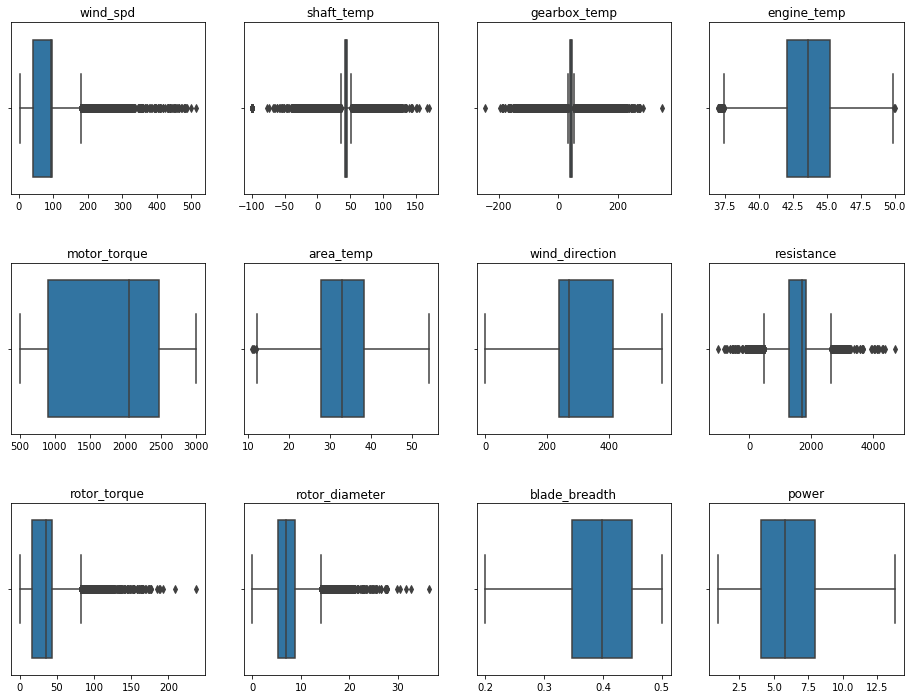

In [197]:
fig, axe = plt.subplots(3,4, figsize=(16,12));
axes = axe.flatten();
for i,j in enumerate(data_new[num_cols]):
  sns.boxplot(data_new[j], ax=axes[i]);
  axes[i].set_title(j);
  axes[i].set_xlabel('');
plt.subplots_adjust(hspace=0.4);
plt.show();

data sudah lumayan bersih dari yang sebelumnya

**Data Train data Test**

In [198]:
num_col = ['wind_spd', 'shaft_temp', 'gearbox_temp', 'engine_temp', 'motor_torque',
            'area_temp', 'wind_direction', 'resistance', 'rotor_torque', 'rotor_diameter',
            'blade_breadth']
cat_col = ['turbine_status', 'cloud_level']

In [199]:
X = data_new.drop('power', axis=1)
y = data_new['power']

In [200]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=rs)

In [201]:
turbine_num_train = X_train[num_col]
turbine_num_test = X_test[num_col]

turbine_cat_train = X_train[cat_col]
turbine_cat_test = X_test[cat_col]

**Handling Missing Value & Data Transformation**

Kolom Numerik

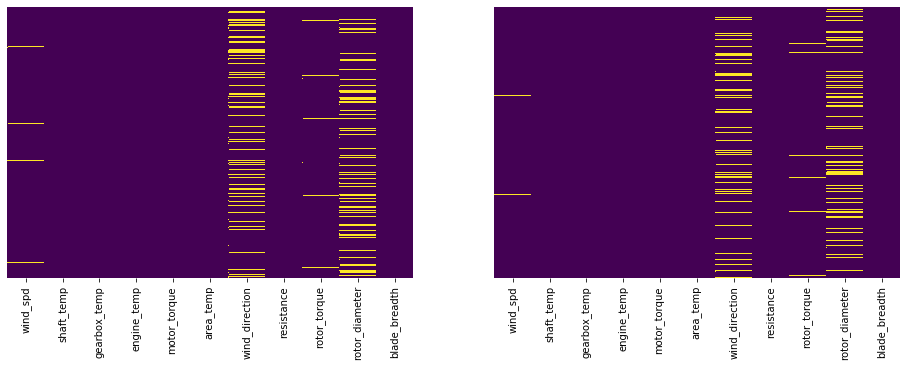

In [202]:
fig, axe = plt.subplots(1,2, figsize=(16,5))
sns.heatmap(turbine_num_train.isnull(),cbar=False, yticklabels=False, cmap = 'viridis', ax=axe[0])
sns.heatmap(turbine_num_test.isnull(),cbar=False, yticklabels=False, cmap = 'viridis', ax=axe[1])

Setelah dicek Mayoritas kolom dengan missing value memiliki data skew, maka missing value akan di impute menggunakan nilai median

In [203]:
# impute
imputer_num = SimpleImputer(strategy='median')
imputer_num.fit(turbine_num_train)

turbine_num_train = imputer_num.transform(turbine_num_train)
turbine_num_test = imputer_num.transform(turbine_num_test)

In [204]:
#scaling
scaler = StandardScaler()
scaler.fit(turbine_num_train)

turbine_num_train = scaler.transform(turbine_num_train)
turbine_num_test = scaler.transform(turbine_num_test)

Kolom Kategorikal

In [205]:
# impute
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(turbine_cat_train)

turbine_cat_train = imputer_cat.transform(turbine_cat_train)
turbine_cat_test = imputer_cat.transform(turbine_cat_test)

In [206]:
#ordinal encoding
stats = ['Very Poor (CCC)', 'Poor (B)', 'Average (BB)', 'Good (BBB)', 'Verry Good (A)', 'Perfect (AAA)', 'Excellent (AA)']
level = ['Extremely Low', 'Low', 'Medium']

oe = OrdinalEncoder(categories=[stats, level])
oe.fit(turbine_cat_train)

turbine_cat_train = oe.transform(turbine_cat_train)
turbine_cat_test = oe.transform(turbine_cat_test)

In [207]:
X_train_all = np.column_stack([turbine_num_train, turbine_cat_train])
X_test_all = np.column_stack([turbine_num_test, turbine_cat_test])

## 6. Model Definition

In [208]:
model_reg = LinearRegression(fit_intercept=True)

In [209]:
model_ridge = Ridge(alpha=0.8)

In [210]:
model_lasso = Lasso(alpha=0.8)

In [211]:
model_dt = DecisionTreeRegressor()

## 7. Model Training

### a. Linear Regression

In [212]:
model_reg.fit(X_train_all, y_train)

LinearRegression()

In [213]:
y_pred_train = model_reg.predict(X_train_all)
y_pred_test = model_reg.predict(X_test_all)

In [214]:
print(model_reg.intercept_)
print(model_reg.coef_)

5.787107301587827
[-0.33018897  0.0159597   0.05168126  1.04562118  0.89886892  0.22780797
  0.33402421 -0.05972587 -0.00767408  0.03115282  0.1079412   0.01419467
  0.17370053]


### b. Ridge

In [215]:
model_ridge.fit(X_train_all, y_train)

Ridge(alpha=0.8)

In [216]:
y_pred_train_rid = model_ridge.predict(X_train_all)
y_pred_test_rid = model_ridge.predict(X_test_all)

### c. Lasso

In [217]:
model_lasso.fit(X_train_all, y_train)

Lasso(alpha=0.8)

In [218]:
y_pred_train_las = model_lasso.predict(X_train_all)
y_pred_test_las = model_lasso.predict(X_test_all)

### d. Decision Tree Regressor

In [219]:
dt = DecisionTreeRegressor()

In [220]:
dt.fit(X_train_all, y_train)

DecisionTreeRegressor()

In [221]:
y_pred_train_dt = dt.predict(X_train_all)
y_pred_test_dt = dt.predict(X_test_all)

## 8. Model Evaluation

In [222]:
def evaluation(real, pred):
  print('MAE:',mean_absolute_error(real,pred))
  print('RMSE:',mean_squared_error(real,pred,squared=False))
  print('R2 Score:',r2_score(real,pred))

### a. Linear Regression

In [223]:
#Train
evaluation(y_train, y_pred_train)

MAE: 1.4966144878656717
RMSE: 1.8707475150756456
R2 Score: 0.4777978882780337


In [224]:
#Test
evaluation(y_test, y_pred_test)

MAE: 1.4835647652401014
RMSE: 1.8620671375935014
R2 Score: 0.47944522064106676


untuk model linear regression, baik R2 score untuk data train dan test masih sangat rendah, penulis akan mencoba menaikan akurasinya dengan mengimplementasikan bentuk polynomial

In [225]:
poly = 'PolynomialFeatures(k)'
model_reg = LinearRegression(fit_intercept=True)

In [226]:
n = 5
poly_per_k = [eval(poly).fit(X_train_all)
                for k in range(2, n)]

score_train=[]
score_test=[]
for i in poly_per_k:
  x_train_poly = i.transform(X_train_all)
  x_test_poly = i.transform(X_test_all)

  model_reg.fit(x_train_poly, y_train)
  y_pred_train_poly = model_reg.predict(x_train_poly)
  y_pred_test_poly = model_reg.predict(x_test_poly)
  s_train = r2_score(y_train, y_pred_train_poly)
  s_test = r2_score(y_test, y_pred_test_poly)
  score_train.append(s_train)
  score_test.append(s_test)

score1 = pd.DataFrame({'Poly Degree': list(np.arange(2,n)), 'R2 Train': score_train, 'R2 Test': score_test}).set_index('Poly Degree')

In [227]:
score1

,R2 Train,R2 Test
Poly Degree,,
2,0.656259,0.655088
3,0.728204,0.712587
4,0.815266,0.672130


penulis melakukan evaluasi model regresi linier menggunakan 3 poly degree yang berbeda. didaptakan bahwa akurasi model naik setelah di lakukan polynomial feature, hanya saja ada beberapa hal yang menjadi catatan. penggunaan polynomial degree=4 membuat model sangat overfitting, sehingga poly degree yang optimal untuk kasus ini adalah 3

### b. Ridge

In [228]:
#Train
evaluation(y_train, y_pred_train_rid)

MAE: 1.4966163650912914
RMSE: 1.8707475160596383
R2 Score: 0.4777978877286886


In [229]:
#Test
evaluation(y_test, y_pred_test_rid)

MAE: 1.4835672911640276
RMSE: 1.8620669435698276
R2 Score: 0.4794453291225961


hyperparameter tunning alpha

In [230]:
params_ridge = {
    'alpha': np.arange(0, 1.1, 0.1)
}
print(params_ridge)

{'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}


In [231]:
rid = Ridge(random_state=rs)
rid_grid = GridSearchCV(rid, params_ridge, cv=5, scoring='r2', return_train_score=True)
rid_grid.fit(X_train_all, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=0),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             return_train_score=True, scoring='r2')

In [232]:
rid_grid.cv_results_['mean_train_score']

array([0.477871, 0.477871, 0.477871, 0.477871, 0.477871, 0.477871,
       0.477871, 0.477871, 0.477871, 0.477871, 0.477871])

untuk model ridge, penggunaan alpha yang berbeda dari 0-1 tidak memberikan improvement yang signifikan pada model

### c. Lasso

In [233]:
#Train
evaluation(y_train, y_pred_train_las)

MAE: 1.7734597378990562
RMSE: 2.16736244852548
R2 Score: 0.2990753090728425


In [234]:
#Test
evaluation(y_test, y_pred_test_las)

MAE: 1.7774487433344763
RMSE: 2.159964234452562
R2 Score: 0.29956331007554216


hyperparameter tunning alpha

In [235]:
params_lasso = {
    'alpha': np.arange(0, 1.1, 0.1)
}
print(params_lasso)

{'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}


In [236]:
las = Lasso(random_state=rs)
las_grid = GridSearchCV(las, params_lasso, cv=5, scoring='r2', return_train_score=True)
las_grid.fit(X_train_all, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=0),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             return_train_score=True, scoring='r2')

In [237]:
las_grid.cv_results_['mean_train_score']

array([0.477871  , 0.46779202, 0.44751099, 0.42986715, 0.40696722,
       0.38311318, 0.35941087, 0.33139897, 0.29907749, 0.26244642,
       0.22150576])

penggunaa alpha dari 0-1 pada model lasso ternyata tidak menujukan improvement performance pada model. pada model lasso untuk alpha dengan nilai tinggi ternyata membuat akurasi model semakin buruk

### d. Decission Tree Regressor

In [238]:
#Train
evaluation(y_train, y_pred_train_dt)

MAE: 0.0
RMSE: 0.0
R2 Score: 1.0


In [239]:
#Train
evaluation(y_test, y_pred_test_dt)

MAE: 0.548116077576012
RMSE: 0.927777161711391
R2 Score: 0.8707700660518222


decision tree menggunakan parameter default sangat overfitting namun kabar baiknya nilai score train sudah cukup tinggi dibandingkan menggunakan model regressi linear, ridge ataupun lasso. penulis akan melakukan gridsearch lebih lanjut untuk menemukan criterion hyperparameter yang tepat dengan menggunakan min_samples_split = 150

In [240]:
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'min_samples_split': [150]
}
print(params)

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'min_samples_split': [150]}


In [241]:
dt = DecisionTreeRegressor(random_state=rs)
dt_grid = GridSearchCV(dt, params, cv=2, scoring='r2', return_train_score=True)
dt_grid.fit(X_train_all, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'min_samples_split': [150]},
             return_train_score=True, scoring='r2')

In [242]:
dt_grid.cv_results_['mean_train_score']

array([0.93712425, 0.93712425, 0.92746923, 0.71840649])

In [243]:
dt_grid.best_estimator_

DecisionTreeRegressor(min_samples_split=150, random_state=0)

ternyata criterion yang paling optimal adalah menggunakan criterion default yaitu 'absolute_error'

In [244]:
dt = DecisionTreeRegressor(criterion='absolute_error', min_samples_split=150, min_samples_leaf=5)
dt.fit(X_train_all, y_train)
y_pred_train_dt = dt.predict(X_train_all)
y_pred_test_dt = dt.predict(X_test_all)

In [245]:
#Train
evaluation(y_train, y_pred_train_dt)

MAE: 0.37995279457355924
RMSE: 0.6584037397209195
R2 Score: 0.935316598851716


In [246]:
#Test
evaluation(y_test, y_pred_test_dt)

MAE: 0.420863956694884
RMSE: 0.7033214604765265
R2 Score: 0.9257351162537136


sejauh ini model decision tree regressor dengan criterion 'absolute_error', min_samples_split=150, dan min_samples_leaf=5 menghasilkan r2 score paling bagus dan tidak overfit.

**Feature Importance**

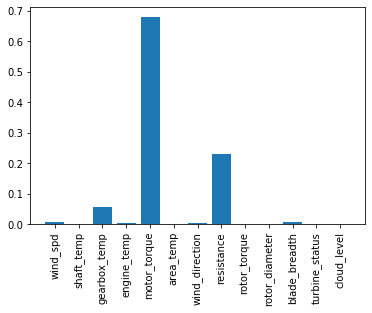

In [247]:
importance = dt.feature_importances_
labels = num_col+cat_col
plt.bar([x for x in range(len(importance))], importance);
plt.xticks(np.arange(13), labels, rotation=90);

berdasarkan visual diatas, ada 3 fitur yang paling mempengaruhi output model. fitur teresebut adalah motor_torque, resistance dan gearbox_temp

## 9. Model Saving

In [248]:
dt

DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=5,
                      min_samples_split=150)

In [249]:
num_pipeline = make_pipeline(imputer_num, scaler)

cat_pipeline = make_pipeline(imputer_cat, oe)

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat', cat_pipeline, cat_col)
])

# final pipeline
final_pipeline = make_pipeline(data_pipeline, dt)

In [250]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['wind_spd', 'shaft_temp',
                                                   'gearbox_temp',
                                                   'engine_temp',
                                                   'motor_torque', 'area_temp',
                                                   'wind_direction',
                                                   'resistance', 'rotor_torque',
                                                   'rotor_diameter',
                                

In [251]:
with open('pipeline_ml2.pkl', 'wb') as f:
    pickle.dump(final_pipeline, f)

## 10. Model Inference

In [252]:
data_inf.head(2)

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,NaN,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823


In [253]:
data_inf2 = data_rename(data_inf)
data_inf2.head(1)

,tracking_id,datetime,wind_spd,atm_temp,shaft_temp,blades_agl,gearbox_temp,engine_temp,motor_torque,generator_temp,atm_press,area_temp,body_temp,wind_direction,resistance,rotor_torque,turbine_status,cloud_level,rotor_diameter,blade_breadth,windmill_height
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.46056,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431


In [254]:
for i in ['wind_spd', 'atm_press', 'windmill_height', 'rotor_diameter', 'rotor_torque', 'blades_agl']:
  data_inf2[i] = abs(data_inf2[i])

In [255]:
inference = data_inf2[data_new.columns.to_list()[0:-1]]
inference = reduce_turbine_status(inference)
inference.head(5)

,wind_spd,shaft_temp,gearbox_temp,engine_temp,motor_torque,area_temp,wind_direction,resistance,rotor_torque,turbine_status,cloud_level,rotor_diameter,blade_breadth
0,94.324266,89.714193,40.460560,39.594734,1073.202715,24.004812,445.976992,1664.222023,21.912243,Average (BB),Medium,3.185837,0.403965
1,10.088870,43.272846,40.027788,41.176860,517.436430,29.431813,499.595287,1165.111992,35.050093,Excellent (AA),Medium,3.016603,0.444755
2,347.152090,41.076640,43.109122,43.439556,1480.716492,29.924235,245.432231,1667.720491,27.195302,Average (BB),Medium,2.611941,0.387368
3,24.471997,14.375078,13.741253,15.577472,887.979475,23.886434,NaN,1329.744740,15.245757,Good (BBB),Low,2.866805,0.450478
4,96.997026,41.405192,121.572907,43.934587,2053.916354,35.906889,442.425744,691.408996,34.257024,Excellent (AA),Low,3.549672,0.368355


In [256]:
y_pred_inf = final_pipeline.predict(inference)

In [257]:
inference['power_pred'] = y_pred_inf
inference.sample(10)

,wind_spd,shaft_temp,gearbox_temp,engine_temp,motor_torque,area_temp,wind_direction,resistance,rotor_torque,turbine_status,cloud_level,rotor_diameter,blade_breadth,power_pred
2234,43.347864,69.349111,45.611574,45.487238,956.596221,43.811340,507.585965,1450.299454,16.992964,Good (BBB),Low,2.105227,0.422604,10.295859
9340,29.219893,22.201388,45.802145,47.559837,871.476315,38.057244,507.868730,1337.076090,64.256096,Good (BBB),Medium,NaN,0.460553,7.261000
11202,97.829536,24.707003,107.930560,43.472700,2172.002308,45.409352,539.799097,2626.849151,35.106595,Verry Good (A),Low,2.823186,0.400428,5.129838
10116,41.209731,44.778668,46.323643,45.304600,968.471557,31.435368,NaN,1464.333663,18.754726,Poor (B),Low,2.147933,0.322628,9.108359
353,93.924361,43.774355,45.969070,42.666719,2634.951598,38.616606,NaN,1888.128650,44.949851,Verry Good (A),Medium,2.138570,0.383960,7.722065
7224,95.007257,40.625494,41.402055,40.923766,1119.377174,21.521149,258.813866,1664.985915,21.594329,Verry Good (A),Low,4.907886,0.484461,2.968280
6665,95.164798,45.897561,44.900942,44.730955,2764.424337,33.288871,11.789537,1897.633567,33.090898,Excellent (AA),Low,2.347248,0.384190,8.100883
9431,17.958037,42.102761,46.064947,46.122378,790.943929,27.765040,379.861171,1255.763908,13.910926,Average (BB),Low,4.128998,0.422265,5.617056
2539,92.661963,46.173515,48.731584,47.277256,2802.337540,33.011710,506.058013,1971.477066,42.473888,Poor (B),Medium,2.719560,0.454396,9.775012
8923,92.877192,43.318208,-61.132835,41.107491,2355.072751,29.022384,239.713705,1796.953993,40.475204,Poor (B),Low,2.796733,0.481767,6.574281


## 10. Kesimpulan

Berdasarkan penjabaran di atas, beberapa kesimpulan yang dapat diambil adalah sebagai berikut.
* dari 4 model yang digunakan (linear regression, lasso, ridge, dan decision tree regressor) ternyata model decision tree regressor yang mampu mengeneralisasi data dengan baik.
* Model terbaik yang digunakan dalam projek ini adalah menggunakan model Decission Tree Regressor dengan Hyperparamter jenis criterion absolute error dan min_samples_split berjumlah 150
* R2 score yang diperoleh dari data test adalah 0.92
* Untuk memproduksi output power yang tinggi maka komponen yang perlu diperhatikan dalam pembagunan turbin tenaga angin adalah Motor Torque. 
* selain motor torque, Resistance dan Gearbox Temperature merupakan 2 fitur lainya yang paling berpengaruh terhadap output model.


App URL : https://milestone2-kevinboy.herokuapp.com/